In [1]:
import pandas as pd

In [10]:
results_df = pd.read_csv('../data/results.csv')
results_df.head()

,Model,Prompting,Keyword,Budget,AIME 2025,MATH500,MMLU Pro-1K,SuperGPQA-1K
0,Qwen2.5 7B Instruct,Zero-shot,NaN,NaN,20.00,69.0,30.3,18.1
1,Qwen2.5 7B Instruct,CoT,NaN,NaN,23.33,68.0,12.0,6.7
2,Qwen2.5 7B Instruct,CoT+BF,Wait,256.0,20.00,41.2,43.5,24.9
3,Qwen2.5 7B Instruct,CoT+BF,Wait,512.0,6.67,55.8,46.7,26.1
4,Qwen2.5 7B Instruct,CoT+BF,Wait,1024.0,26.67,64.4,50.2,26.3


In [11]:
selected_models = ["RFT", "simplescaling/s1.1-7B", "open-thoughts/OpenThinker3-7B", "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B"]
results_df = results_df[results_df['Model'].isin(selected_models)]

results_df = results_df[results_df['Prompting'].isin(["Zero-shot", "CoT", "CoT+BF"])]
results_df = results_df[(results_df['Budget'] == 8192) | (results_df['Budget'].isnull())]
results_df = results_df[(results_df['Keyword'] == "Wait") | (results_df['Keyword'].isnull())]

results_df.head()

,Model,Prompting,Keyword,Budget,AIME 2025,MATH500,MMLU Pro-1K,SuperGPQA-1K
10,RFT,CoT,NaN,NaN,20.00,69.4,9.8,6.7
16,RFT,CoT+BF,Wait,8192.0,23.33,63.8,45.2,27.8
19,simplescaling/s1.1-7B,Zero-shot,NaN,NaN,20.00,73.6,40.2,17.4
25,simplescaling/s1.1-7B,CoT+BF,Wait,8192.0,23.33,74.2,62.1,33.4
28,open-thoughts/OpenThinker3-7B,Zero-shot,NaN,NaN,26.67,81.0,51.4,24.6


In [21]:
table_df = results_df.copy()
table_df["Approach"] = table_df["Prompting"].map(lambda x: "Zero-shot" if x in ["Zero-shot", "CoT"] else "CoT+BF")
table_df = table_df[["Model", "Approach", "AIME 2025", "MATH500", "MMLU Pro-1K", "SuperGPQA-1K"]]

# Clean model names for better readability
table_df["Model"] = table_df["Model"].map({
    "RFT": "RFT",
    "simplescaling/s1.1-7B": "s1.1-7B",
    "open-thoughts/OpenThinker3-7B": "OpenThinker3-7B",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B": "DeepSeek-R1-7B"
})

table_df["Average"] = table_df[["AIME 2025", "MATH500", "MMLU Pro-1K", "SuperGPQA-1K"]].mean(axis=1)

def format_num(x):
    try:
        return f"{float(x):.2f}"
    except:
        return ""

for col in ["AIME 2025", "MATH500", "MMLU Pro-1K", "SuperGPQA-1K", "Average"]:
    table_df[col] = table_df[col].apply(format_num)

print(table_df.to_markdown(index=False, floatfmt=".2f"))

| Model           | Approach   |   AIME 2025 |   MATH500 |   MMLU Pro-1K |   SuperGPQA-1K |   Average |
|:----------------|:-----------|------------:|----------:|--------------:|---------------:|----------:|
| RFT             | Zero-shot  |       20.00 |     69.40 |          9.80 |           6.70 |     26.48 |
| RFT             | CoT+BF     |       23.33 |     63.80 |         45.20 |          27.80 |     40.03 |
| s1.1-7B         | Zero-shot  |       20.00 |     73.60 |         40.20 |          17.40 |     37.80 |
| s1.1-7B         | CoT+BF     |       23.33 |     74.20 |         62.10 |          33.40 |     48.26 |
| OpenThinker3-7B | Zero-shot  |       26.67 |     81.00 |         51.40 |          24.60 |     45.92 |
| OpenThinker3-7B | CoT+BF     |       53.33 |     87.00 |         61.10 |          36.60 |     59.51 |
| DeepSeek-R1-7B  | Zero-shot  |       33.33 |     81.00 |         12.00 |           5.20 |     32.88 |
| DeepSeek-R1-7B  | CoT+BF     |       26.67 |     83.40 |      

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = '#f8f9fa'


In [24]:
# Create a styled table with conditional formatting
display_df = results_df.copy()
display_df["Model"] = display_df["Model"].map({
    "RFT": "RFT",
    "simplescaling/s1.1-7B": "s1.1-7B",
    "open-thoughts/OpenThinker3-7B": "OpenThinker3-7B",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B": "DeepSeek-R1-7B"
})
display_df["Approach"] = display_df["Prompting"].map(lambda x: "Zero-shot" if x in ["Zero-shot", "CoT"] else "CoT+BF")
display_df = display_df[["Model", "Approach", "AIME 2025", "MATH500", "MMLU Pro-1K", "SuperGPQA-1K"]]
display_df["Average"] = display_df[["AIME 2025", "MATH500", "MMLU Pro-1K", "SuperGPQA-1K"]].mean(axis=1)

# Apply styling
styled_table = display_df.style.format({
    "AIME 2025": "{:.2f}",
    "MATH500": "{:.2f}",
    "MMLU Pro-1K": "{:.2f}",
    "SuperGPQA-1K": "{:.2f}",
    "Average": "{:.2f}"
}).background_gradient(
    subset=["AIME 2025", "MATH500", "MMLU Pro-1K", "SuperGPQA-1K", "Average"],
    cmap="RdYlGn",
    vmin=0,
    vmax=100
).set_properties(**{
    'text-align': 'center',
    'font-size': '11pt',
    'border': '1px solid #ddd'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#2c3e50'), ('color', 'white'), 
                                  ('font-weight', 'bold'), ('text-align', 'center'),
                                  ('padding', '12px'), ('font-size', '12pt')]},
    {'selector': 'td', 'props': [('padding', '10px')]},
    {'selector': 'tr:hover', 'props': [('background-color', '#e8f4f8')]}
])

styled_table


,Model,Approach,AIME 2025,MATH500,MMLU Pro-1K,SuperGPQA-1K,Average
10,RFT,Zero-shot,20.00,69.40,9.80,6.70,26.48
16,RFT,CoT+BF,23.33,63.80,45.20,27.80,40.03
19,s1.1-7B,Zero-shot,20.00,73.60,40.20,17.40,37.80
25,s1.1-7B,CoT+BF,23.33,74.20,62.10,33.40,48.26
28,OpenThinker3-7B,Zero-shot,26.67,81.00,51.40,24.60,45.92
34,OpenThinker3-7B,CoT+BF,53.33,87.00,61.10,36.60,59.51
35,DeepSeek-R1-7B,Zero-shot,33.33,81.00,12.00,5.20,32.88
41,DeepSeek-R1-7B,CoT+BF,26.67,83.40,10.80,6.70,31.89


## 📈 Performance Comparison: Zero-shot vs CoT+BF


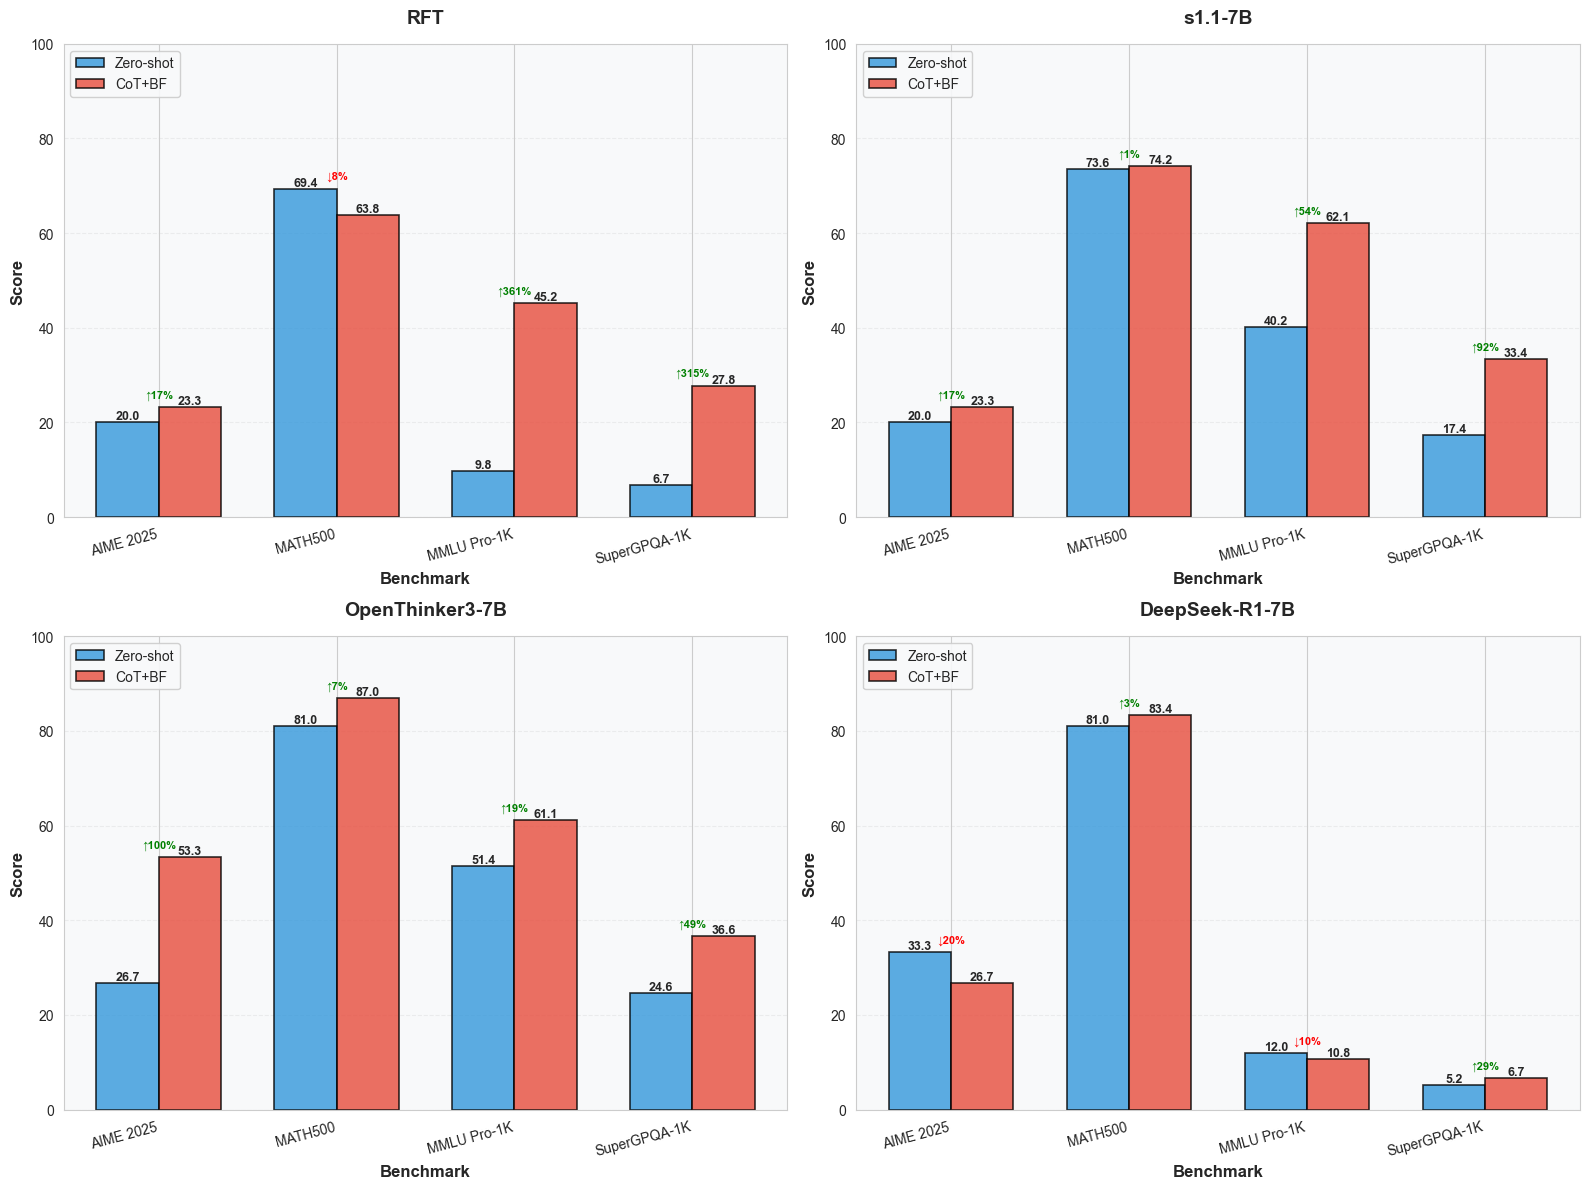

In [30]:
# Prepare data for grouped bar chart
plot_df = display_df.copy()
benchmarks = ["AIME 2025", "MATH500", "MMLU Pro-1K", "SuperGPQA-1K"]

# Create subplots for each model
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

models_list = plot_df["Model"].unique()
colors = {'Zero-shot': '#3498db', 'CoT+BF': '#e74c3c'}

for idx, model in enumerate(models_list):
    ax = axes[idx]
    model_data = plot_df[plot_df["Model"] == model]
    
    x = np.arange(len(benchmarks))
    width = 0.35
    
    zero_shot_data = model_data[model_data["Approach"] == "Zero-shot"][benchmarks].values.flatten()
    cot_bf_data = model_data[model_data["Approach"] == "CoT+BF"][benchmarks].values.flatten()
    
    bars1 = ax.bar(x - width/2, zero_shot_data, width, label='Zero-shot', 
                   color=colors['Zero-shot'], alpha=0.8, edgecolor='black', linewidth=1.2)
    bars2 = ax.bar(x + width/2, cot_bf_data, width, label='CoT+BF', 
                   color=colors['CoT+BF'], alpha=0.8, edgecolor='black', linewidth=1.2)
    
    # Add value labels on bars
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.1f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    ax.set_xlabel('Benchmark', fontsize=12, fontweight='bold')
    ax.set_ylabel('Score', fontsize=12, fontweight='bold')
    ax.set_title(f'{model}', fontsize=14, fontweight='bold', pad=15)
    ax.set_xticks(x)
    ax.set_xticklabels(benchmarks, rotation=15, ha='right')
    ax.legend(loc='upper left', framealpha=0.9, fontsize=10)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.set_ylim(0, 100)
    
    # Add improvement indicators
    for i, (zs, cb) in enumerate(zip(zero_shot_data, cot_bf_data)):
        if cb > zs:
            improvement = ((cb - zs) / zs) * 100
            ax.annotate(f'↑{improvement:.0f}%', xy=(i, max(zs, cb) + 2), 
                       ha='center', fontsize=8, color='green', fontweight='bold')
        elif cb < zs:
            decline = ((zs - cb) / zs) * 100
            ax.annotate(f'↓{decline:.0f}%', xy=(i, max(zs, cb) + 2), 
                       ha='center', fontsize=8, color='red', fontweight='bold')

plt.tight_layout()
plt.savefig('outputs/fig_1_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

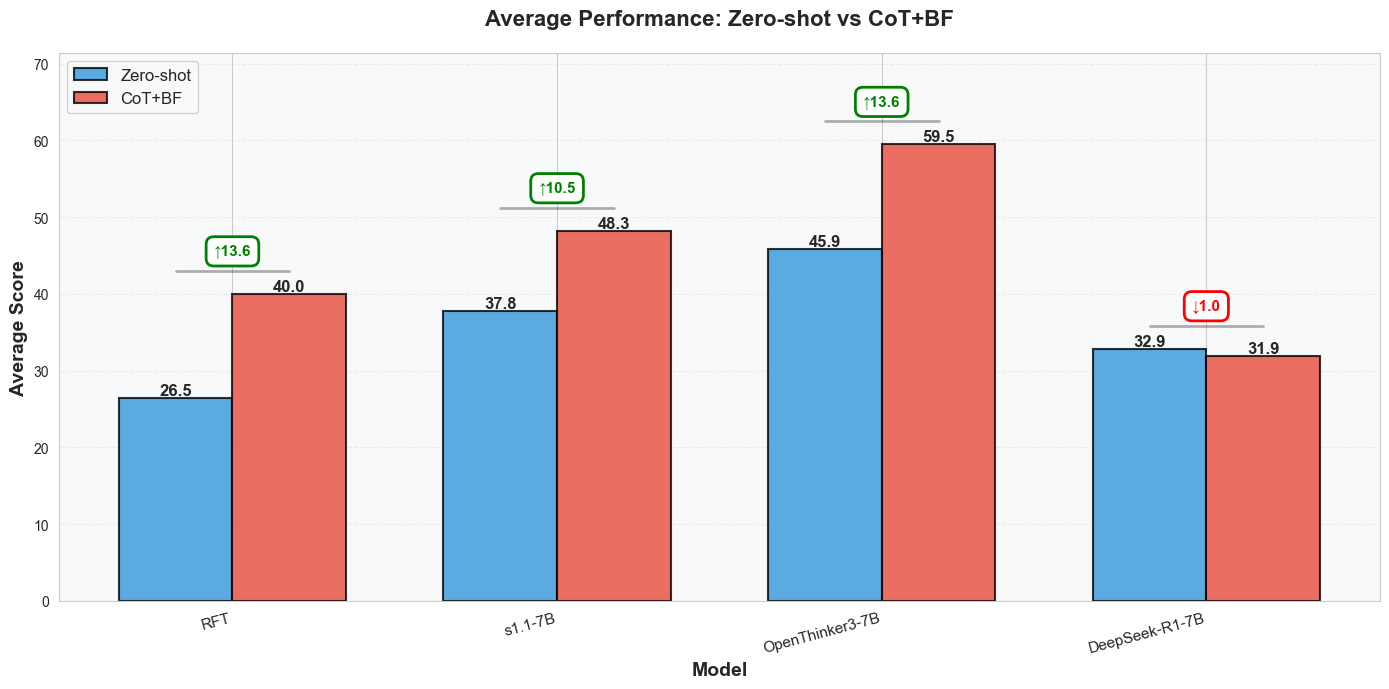

In [31]:
# Create average performance comparison
fig, ax = plt.subplots(figsize=(14, 7))

models_list = plot_df["Model"].unique()
x = np.arange(len(models_list))
width = 0.35

zero_shot_avg = [plot_df[(plot_df["Model"] == m) & (plot_df["Approach"] == "Zero-shot")]["Average"].values[0] 
                 for m in models_list]
cot_bf_avg = [plot_df[(plot_df["Model"] == m) & (plot_df["Approach"] == "CoT+BF")]["Average"].values[0] 
              for m in models_list]

bars1 = ax.bar(x - width/2, zero_shot_avg, width, label='Zero-shot', 
               color='#3498db', alpha=0.8, edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x + width/2, cot_bf_avg, width, label='CoT+BF', 
               color='#e74c3c', alpha=0.8, edgecolor='black', linewidth=1.5)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
               f'{height:.1f}', ha='center', va='bottom', 
               fontsize=12, fontweight='bold')

# Add difference indicators
for i, (zs, cb) in enumerate(zip(zero_shot_avg, cot_bf_avg)):
    diff = cb - zs
    color = 'green' if diff > 0 else 'red'
    symbol = '↑' if diff > 0 else '↓'
    ax.plot([i - width/2, i + width/2], [max(zs, cb) + 3, max(zs, cb) + 3], 
            'k-', linewidth=2, alpha=0.3)
    ax.text(i, max(zs, cb) + 5, f'{symbol}{abs(diff):.1f}', 
           ha='center', fontsize=11, color=color, fontweight='bold',
           bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor=color, linewidth=2))

ax.set_xlabel('Model', fontsize=14, fontweight='bold')
ax.set_ylabel('Average Score', fontsize=14, fontweight='bold')
ax.set_title('Average Performance: Zero-shot vs CoT+BF', fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(models_list, rotation=15, ha='right', fontsize=11)
ax.legend(loc='upper left', framealpha=0.9, fontsize=12)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_ylim(0, max(zero_shot_avg + cot_bf_avg) * 1.2)

plt.tight_layout()
plt.savefig('outputs/fig_2_average_performance.png', dpi=300, bbox_inches='tight')
plt.show()
